## Preprocessing our dataset before building a machine learning model:

Standard Imports:

In [1]:
import pandas as pd
import numpy as np

Importing .csv file using pandas .read_csv function:

In [2]:
trek_data = pd.read_csv("../Data/trekkers_df.csv")
# drop data where Email-ID is duplicated
trek_data = trek_data.drop_duplicates(subset = "Email-ID")
# reset index
trek_data = trek_data.reset_index(drop = True)
trek_data["trekker_id"] = trek_data.index
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,antoniogude@heydrich.org,Cynthia Säuberlich,171,87,18,F,Nagpur,Sky-One,"['Gujarati', 'Urdu', 'Hindi']",PCCOE,Occupationaltherapists,N,"['Thursday', 'Tuesday', 'Saturday']",0,Beginner,0
1,constantin43@aol.de,Freddy Pechel,176,62,40,None,Nagpur,Krishna Kamal,['Gujarati'],MIT-ADT,pharmacist,Y,"['Saturday', 'Thursday']",3,Intermediate,1
2,frankeklaus-guenter@textor.com,Karl-Werner Hering B.Sc.,182,69,41,F,Nagpur,Evergreen Society,"['English', 'Bengali']",PICT,farmer,N,"['Saturday', 'Sunday', 'Wednesday']",0,Beginner,2
3,killertraude@paertzelt.com,Heiner Lachmann B.Eng.,193,68,53,None,Nashik,Midori Towers,"['Gujarati', 'English']",SPPU,Paramedics,Y,"['Sunday', 'Monday', 'Friday']",2,Experienced,3
4,hethursalih@thies.de,Ernst-Dieter Rose MBA.,181,86,31,None,Nagpur,Krishna Park,"['Urdu', 'Bengali']",VIT,therapist,Y,"['Tuesday', 'Friday', 'Wednesday', 'Thursday',...",3,Experienced,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,josefine50@gmail.com,Dr. Christian Wieloch,165,58,18,M,Nagpur,Krishna Kamal,"['Marathi', 'English']",MIT-ADT,Optometrists,Y,"['Wednesday', 'Saturday', 'Tuesday', 'Monday']",4,Experienced,9987
9988,qfoerster@beckmann.com,Hulda Wende,163,109,27,None,Nagpur,Midori Towers,['Urdu'],MIT-ADT,EMTspecialist,Y,"['Thursday', 'Tuesday', 'Saturday']",1,Beginner,9988
9989,ludwig56@gmail.com,Aloisia Hoffmann,190,105,46,F,Nagpur,Midori Towers,"['Bengali', 'Marathi', 'Hindi']",PCCOE,barber,N,['Monday'],0,Beginner,9989
9990,yriehl@gmx.de,Nina Schleich,187,84,23,M,Kolhapur,24K-KPS,['English'],SPPU,lawyer,Y,"['Wednesday', 'Tuesday', 'Monday', 'Saturday',...",2,Beginner,9990


Checking if our dataset has any missing values:

In [3]:
trek_data.isna().sum()

Email-ID                  0
Name                      0
Height                    0
Weight                    0
Age                       0
Gender                    0
City                      0
Locality                  0
Languages                 0
college                   0
Profession                0
Have you gone Trekking    0
Preferred Days            0
Number of Treks           0
Difficulty of Trek        0
trekker_id                0
dtype: int64

Identifying different types of datatypes in our dataset

In [4]:
trek_data.dtypes

Email-ID                  object
Name                      object
Height                     int64
Weight                     int64
Age                        int64
Gender                    object
City                      object
Locality                  object
Languages                 object
college                   object
Profession                object
Have you gone Trekking    object
Preferred Days            object
Number of Treks            int64
Difficulty of Trek        object
trekker_id                 int64
dtype: object

In [5]:
trek_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Email-ID                9992 non-null   object
 1   Name                    9992 non-null   object
 2   Height                  9992 non-null   int64 
 3   Weight                  9992 non-null   int64 
 4   Age                     9992 non-null   int64 
 5   Gender                  9992 non-null   object
 6   City                    9992 non-null   object
 7   Locality                9992 non-null   object
 8   Languages               9992 non-null   object
 9   college                 9992 non-null   object
 10  Profession              9992 non-null   object
 11  Have you gone Trekking  9992 non-null   object
 12  Preferred Days          9992 non-null   object
 13  Number of Treks         9992 non-null   int64 
 14  Difficulty of Trek      9992 non-null   object
 15  trek

note: Here we need to convert our categorical data to numerical data for implementing our ML model

In [6]:
trek_data.describe()

,Height,Weight,Age,Number of Treks,trekker_id
count,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000
mean,179.639311,79.931145,29.655024,1.238090,4995.500000
std,11.547919,17.503371,9.393508,1.453671,2884.586279
min,160.000000,50.000000,10.000000,0.000000,0.000000
25%,170.000000,65.000000,23.000000,0.000000,2497.750000
50%,180.000000,80.000000,29.000000,0.000000,4995.500000
75%,190.000000,95.000000,36.000000,3.000000,7493.250000
max,199.000000,110.000000,67.000000,6.000000,9991.000000


In [7]:
# 

In [8]:
import matplotlib.pyplot as plt

In [9]:
# get names of people who have the same age using groupby
# and count the number of people in each group
# then sort the values in descending order

age_aggregate = trek_data.groupby(by="Age").groups

In [10]:
for age in age_aggregate:
    print(f"Age: {age}")
    print(trek_data.loc[age_aggregate[age], ["Name", "Age"]])

Age: 10
                          Name  Age
60       Karl-Georg Neureuther   10
150          Hendrik Hein B.A.   10
289              Ercan Harloff   10
296   Herr Andreas Wende B.Sc.   10
479        Klaus Etzold B.Eng.   10
...                        ...  ...
9683  Erkan Bonbach-Säuberlich   10
9814           Kamil Gehringer   10
9879        Martha Zirme B.Sc.   10
9944           Reinhart Knappe   10
9984               Adina Spieß   10

[87 rows x 2 columns]
Age: 11
                            Name  Age
298   Ottomar Freudenberger B.A.   11
530     Ing. Josip Koch II B.Sc.   11
680                 Camilla Rust   11
875              Heinz-Gerd Weiß   11
931               Leonard Hornig   11
...                          ...  ...
9747     Veronique Walter-Weller   11
9804               Georgia Budig   11
9848             Athanasios Otto   11
9869   Reinhardt Patberg-Hornich   11
9870   Annelies Jäkel-Neureuther   11

[92 rows x 2 columns]
Age: 12
                    Name  Age
121      Swe

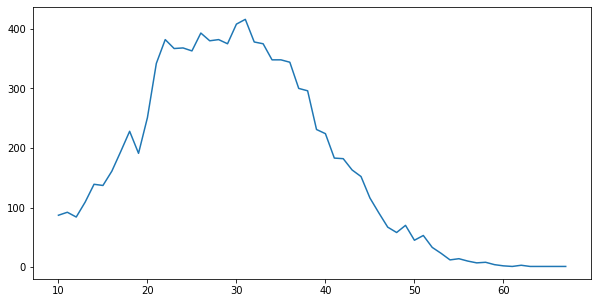

In [11]:
# aggregate the data by age and count the number of people in each group
age_aggregate = trek_data.groupby(by="Age").count()
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(age_aggregate.index, age_aggregate["trekker_id"])

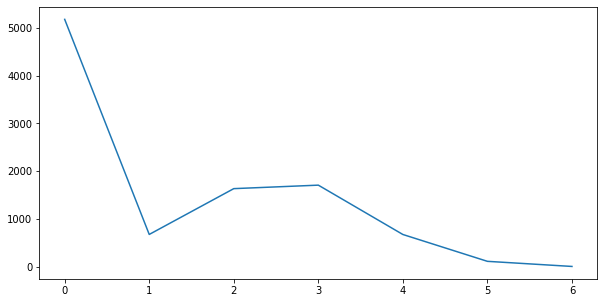

In [12]:
# aggregate by number of treks and count the number of people in each group
trek_aggregate = trek_data.groupby(by="Number of Treks").count()
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(trek_aggregate.index, trek_aggregate["trekker_id"])


In [13]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

trek_data.columns

Index(['Email-ID', 'Name', 'Height', 'Weight', 'Age', 'Gender', 'City',
       'Locality', 'Languages', 'college', 'Profession',
       'Have you gone Trekking', 'Preferred Days', 'Number of Treks',
       'Difficulty of Trek', 'trekker_id'],
      dtype='object')

In [14]:
for categorical_data in ["Gender","City","Locality","Have you gone Trekking","Profession","college","Difficulty of Trek"]:
    # fit and transform the data
    trek_data[categorical_data] = le.fit_transform(trek_data[categorical_data])

In [15]:
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,antoniogude@heydrich.org,Cynthia Säuberlich,171,87,18,0,2,5,"['Gujarati', 'Urdu', 'Hindi']",2,43,0,"['Thursday', 'Tuesday', 'Saturday']",0,0,0
1,constantin43@aol.de,Freddy Pechel,176,62,40,2,2,2,['Gujarati'],0,118,1,"['Saturday', 'Thursday']",3,2,1
2,frankeklaus-guenter@textor.com,Karl-Werner Hering B.Sc.,182,69,41,0,2,1,"['English', 'Bengali']",3,106,0,"['Saturday', 'Sunday', 'Wednesday']",0,0,2
3,killertraude@paertzelt.com,Heiner Lachmann B.Eng.,193,68,53,2,3,4,"['Gujarati', 'English']",4,48,1,"['Sunday', 'Monday', 'Friday']",2,1,3
4,hethursalih@thies.de,Ernst-Dieter Rose MBA.,181,86,31,2,2,3,"['Urdu', 'Bengali']",5,135,1,"['Tuesday', 'Friday', 'Wednesday', 'Thursday',...",3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,josefine50@gmail.com,Dr. Christian Wieloch,165,58,18,1,2,2,"['Marathi', 'English']",0,46,1,"['Wednesday', 'Saturday', 'Tuesday', 'Monday']",4,1,9987
9988,qfoerster@beckmann.com,Hulda Wende,163,109,27,2,2,4,['Urdu'],0,23,1,"['Thursday', 'Tuesday', 'Saturday']",1,0,9988
9989,ludwig56@gmail.com,Aloisia Hoffmann,190,105,46,0,2,4,"['Bengali', 'Marathi', 'Hindi']",2,85,0,['Monday'],0,0,9989
9990,yriehl@gmx.de,Nina Schleich,187,84,23,1,0,0,['English'],4,111,1,"['Wednesday', 'Tuesday', 'Monday', 'Saturday',...",2,0,9990


In [16]:
# Languages column is of type object
# convert it to a list
# remove [ and ] from the string
# split the string by comma


trek_data["Languages"] = trek_data["Languages"].apply(lambda x: x[1:-1].split(","))
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: x[1:-1].split(","))

In [17]:
# apply label encoder to each element of the list
trek_data["Languages"] = trek_data["Languages"].apply(lambda x: le.fit_transform(x))
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: le.fit_transform(x))

In [18]:
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,antoniogude@heydrich.org,Cynthia Säuberlich,171,87,18,0,2,5,"[2, 1, 0]",2,43,0,"[2, 1, 0]",0,0,0
1,constantin43@aol.de,Freddy Pechel,176,62,40,2,2,2,[0],0,118,1,"[1, 0]",3,2,1
2,frankeklaus-guenter@textor.com,Karl-Werner Hering B.Sc.,182,69,41,0,2,1,"[1, 0]",3,106,0,"[2, 0, 1]",0,0,2
3,killertraude@paertzelt.com,Heiner Lachmann B.Eng.,193,68,53,2,3,4,"[1, 0]",4,48,1,"[2, 1, 0]",2,1,3
4,hethursalih@thies.de,Ernst-Dieter Rose MBA.,181,86,31,2,2,3,"[1, 0]",5,135,1,"[5, 0, 4, 3, 1, 2]",3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,josefine50@gmail.com,Dr. Christian Wieloch,165,58,18,1,2,2,"[1, 0]",0,46,1,"[3, 1, 2, 0]",4,1,9987
9988,qfoerster@beckmann.com,Hulda Wende,163,109,27,2,2,4,[0],0,23,1,"[2, 1, 0]",1,0,9988
9989,ludwig56@gmail.com,Aloisia Hoffmann,190,105,46,0,2,4,"[2, 1, 0]",2,85,0,[0],0,0,9989
9990,yriehl@gmx.de,Nina Schleich,187,84,23,1,0,0,[0],4,111,1,"[6, 5, 1, 2, 4, 3, 0]",2,0,9990


In [19]:
# create BMI column
trek_data["BMI"] = trek_data["Weight"] / (trek_data["Height"] / 100) ** 2

In [20]:
# drop the columns that are not required
trek_data = trek_data.drop(columns = ["Name", "Email-ID", "Weight", "Height"])

In [21]:
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id,BMI
0,18,0,2,5,"[2, 1, 0]",2,43,0,"[2, 1, 0]",0,0,0,29.752744
1,40,2,2,2,[0],0,118,1,"[1, 0]",3,2,1,20.015496
2,41,0,2,1,"[1, 0]",3,106,0,"[2, 0, 1]",0,0,2,20.830818
3,53,2,3,4,"[1, 0]",4,48,1,"[2, 1, 0]",2,1,3,18.255524
4,31,2,2,3,"[1, 0]",5,135,1,"[5, 0, 4, 3, 1, 2]",3,1,4,26.250725
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,18,1,2,2,"[1, 0]",0,46,1,"[3, 1, 2, 0]",4,1,9987,21.303949
9988,27,2,2,4,[0],0,23,1,"[2, 1, 0]",1,0,9988,41.025255
9989,46,0,2,4,"[2, 1, 0]",2,85,0,[0],0,0,9989,29.085873
9990,23,1,0,0,[0],4,111,1,"[6, 5, 1, 2, 4, 3, 0]",2,0,9990,24.021276


In [22]:
trek_data.to_csv("../Data/trekkers_df_encoded.csv", index = False)

In [23]:
# pick a random row from the dataframe
random = trek_data.iloc[np.random.randint(0, len(trek_data))]

In [24]:
random

Age                              36
Gender                            1
City                              3
Locality                          0
Languages                    [1, 0]
college                           3
Profession                        4
Have you gone Trekking            0
Preferred Days                  [0]
Number of Treks                   0
Difficulty of Trek                0
trekker_id                     2911
BMI                       23.735308
Name: 2911, dtype: object

In [25]:
# lets try one hot encoding on the original dataframe
trek_data = pd.read_csv("../Data/trekkers_df.csv")
trek_data = trek_data.drop_duplicates(subset = "Email-ID")
trek_data = trek_data.reset_index(drop = True)

In [26]:
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek
0,antoniogude@heydrich.org,Cynthia Säuberlich,171,87,18,F,Nagpur,Sky-One,"['Gujarati', 'Urdu', 'Hindi']",PCCOE,Occupationaltherapists,N,"['Thursday', 'Tuesday', 'Saturday']",0,Beginner
1,constantin43@aol.de,Freddy Pechel,176,62,40,None,Nagpur,Krishna Kamal,['Gujarati'],MIT-ADT,pharmacist,Y,"['Saturday', 'Thursday']",3,Intermediate
2,frankeklaus-guenter@textor.com,Karl-Werner Hering B.Sc.,182,69,41,F,Nagpur,Evergreen Society,"['English', 'Bengali']",PICT,farmer,N,"['Saturday', 'Sunday', 'Wednesday']",0,Beginner
3,killertraude@paertzelt.com,Heiner Lachmann B.Eng.,193,68,53,None,Nashik,Midori Towers,"['Gujarati', 'English']",SPPU,Paramedics,Y,"['Sunday', 'Monday', 'Friday']",2,Experienced
4,hethursalih@thies.de,Ernst-Dieter Rose MBA.,181,86,31,None,Nagpur,Krishna Park,"['Urdu', 'Bengali']",VIT,therapist,Y,"['Tuesday', 'Friday', 'Wednesday', 'Thursday',...",3,Experienced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,josefine50@gmail.com,Dr. Christian Wieloch,165,58,18,M,Nagpur,Krishna Kamal,"['Marathi', 'English']",MIT-ADT,Optometrists,Y,"['Wednesday', 'Saturday', 'Tuesday', 'Monday']",4,Experienced
9988,qfoerster@beckmann.com,Hulda Wende,163,109,27,None,Nagpur,Midori Towers,['Urdu'],MIT-ADT,EMTspecialist,Y,"['Thursday', 'Tuesday', 'Saturday']",1,Beginner
9989,ludwig56@gmail.com,Aloisia Hoffmann,190,105,46,F,Nagpur,Midori Towers,"['Bengali', 'Marathi', 'Hindi']",PCCOE,barber,N,['Monday'],0,Beginner
9990,yriehl@gmx.de,Nina Schleich,187,84,23,M,Kolhapur,24K-KPS,['English'],SPPU,lawyer,Y,"['Wednesday', 'Tuesday', 'Monday', 'Saturday',...",2,Beginner


In [27]:
# drop email, name 
trek_data = trek_data.drop(columns = ["Email-ID", "Name"])

In [28]:
trek_data

,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek
0,171,87,18,F,Nagpur,Sky-One,"['Gujarati', 'Urdu', 'Hindi']",PCCOE,Occupationaltherapists,N,"['Thursday', 'Tuesday', 'Saturday']",0,Beginner
1,176,62,40,None,Nagpur,Krishna Kamal,['Gujarati'],MIT-ADT,pharmacist,Y,"['Saturday', 'Thursday']",3,Intermediate
2,182,69,41,F,Nagpur,Evergreen Society,"['English', 'Bengali']",PICT,farmer,N,"['Saturday', 'Sunday', 'Wednesday']",0,Beginner
3,193,68,53,None,Nashik,Midori Towers,"['Gujarati', 'English']",SPPU,Paramedics,Y,"['Sunday', 'Monday', 'Friday']",2,Experienced
4,181,86,31,None,Nagpur,Krishna Park,"['Urdu', 'Bengali']",VIT,therapist,Y,"['Tuesday', 'Friday', 'Wednesday', 'Thursday',...",3,Experienced
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,165,58,18,M,Nagpur,Krishna Kamal,"['Marathi', 'English']",MIT-ADT,Optometrists,Y,"['Wednesday', 'Saturday', 'Tuesday', 'Monday']",4,Experienced
9988,163,109,27,None,Nagpur,Midori Towers,['Urdu'],MIT-ADT,EMTspecialist,Y,"['Thursday', 'Tuesday', 'Saturday']",1,Beginner
9989,190,105,46,F,Nagpur,Midori Towers,"['Bengali', 'Marathi', 'Hindi']",PCCOE,barber,N,['Monday'],0,Beginner
9990,187,84,23,M,Kolhapur,24K-KPS,['English'],SPPU,lawyer,Y,"['Wednesday', 'Tuesday', 'Monday', 'Saturday',...",2,Beginner


In [29]:
# add bmi column
trek_data["BMI"] = trek_data["Weight"] / (trek_data["Height"] / 100) ** 2
# drop weight and height
trek_data = trek_data.drop(columns = ["Weight", "Height"])
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,BMI
0,18,F,Nagpur,Sky-One,"['Gujarati', 'Urdu', 'Hindi']",PCCOE,Occupationaltherapists,N,"['Thursday', 'Tuesday', 'Saturday']",0,Beginner,29.752744
1,40,None,Nagpur,Krishna Kamal,['Gujarati'],MIT-ADT,pharmacist,Y,"['Saturday', 'Thursday']",3,Intermediate,20.015496
2,41,F,Nagpur,Evergreen Society,"['English', 'Bengali']",PICT,farmer,N,"['Saturday', 'Sunday', 'Wednesday']",0,Beginner,20.830818
3,53,None,Nashik,Midori Towers,"['Gujarati', 'English']",SPPU,Paramedics,Y,"['Sunday', 'Monday', 'Friday']",2,Experienced,18.255524
4,31,None,Nagpur,Krishna Park,"['Urdu', 'Bengali']",VIT,therapist,Y,"['Tuesday', 'Friday', 'Wednesday', 'Thursday',...",3,Experienced,26.250725
...,...,...,...,...,...,...,...,...,...,...,...,...
9987,18,M,Nagpur,Krishna Kamal,"['Marathi', 'English']",MIT-ADT,Optometrists,Y,"['Wednesday', 'Saturday', 'Tuesday', 'Monday']",4,Experienced,21.303949
9988,27,None,Nagpur,Midori Towers,['Urdu'],MIT-ADT,EMTspecialist,Y,"['Thursday', 'Tuesday', 'Saturday']",1,Beginner,41.025255
9989,46,F,Nagpur,Midori Towers,"['Bengali', 'Marathi', 'Hindi']",PCCOE,barber,N,['Monday'],0,Beginner,29.085873
9990,23,M,Kolhapur,24K-KPS,['English'],SPPU,lawyer,Y,"['Wednesday', 'Tuesday', 'Monday', 'Saturday',...",2,Beginner,24.021276


In [30]:
# apply label encoder to gender, city, locality, have you gone trekking, profession, college, difficulty of trek

for categorical in ["Gender","City","Locality","Have you gone Trekking","Profession","college","Difficulty of Trek"]:
    trek_data[categorical] = le.fit_transform(trek_data[categorical])

In [31]:
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,BMI
0,18,0,2,5,"['Gujarati', 'Urdu', 'Hindi']",2,43,0,"['Thursday', 'Tuesday', 'Saturday']",0,0,29.752744
1,40,2,2,2,['Gujarati'],0,118,1,"['Saturday', 'Thursday']",3,2,20.015496
2,41,0,2,1,"['English', 'Bengali']",3,106,0,"['Saturday', 'Sunday', 'Wednesday']",0,0,20.830818
3,53,2,3,4,"['Gujarati', 'English']",4,48,1,"['Sunday', 'Monday', 'Friday']",2,1,18.255524
4,31,2,2,3,"['Urdu', 'Bengali']",5,135,1,"['Tuesday', 'Friday', 'Wednesday', 'Thursday',...",3,1,26.250725
...,...,...,...,...,...,...,...,...,...,...,...,...
9987,18,1,2,2,"['Marathi', 'English']",0,46,1,"['Wednesday', 'Saturday', 'Tuesday', 'Monday']",4,1,21.303949
9988,27,2,2,4,['Urdu'],0,23,1,"['Thursday', 'Tuesday', 'Saturday']",1,0,41.025255
9989,46,0,2,4,"['Bengali', 'Marathi', 'Hindi']",2,85,0,['Monday'],0,0,29.085873
9990,23,1,0,0,['English'],4,111,1,"['Wednesday', 'Tuesday', 'Monday', 'Saturday',...",2,0,24.021276


In [32]:
# one hot encode languages and preferred days

# Languages column is of type object
# convert it to a list
# remove [ and ] from the string
# split the string by comma

trek_data["Languages"] = trek_data["Languages"].apply(lambda x: x[2:-2].split("', '"))
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: x[2:-2].split("', '"))
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,BMI
0,18,0,2,5,"[Gujarati, Urdu, Hindi]",2,43,0,"[Thursday, Tuesday, Saturday]",0,0,29.752744
1,40,2,2,2,[Gujarati],0,118,1,"[Saturday, Thursday]",3,2,20.015496
2,41,0,2,1,"[English, Bengali]",3,106,0,"[Saturday, Sunday, Wednesday]",0,0,20.830818
3,53,2,3,4,"[Gujarati, English]",4,48,1,"[Sunday, Monday, Friday]",2,1,18.255524
4,31,2,2,3,"[Urdu, Bengali]",5,135,1,"[Tuesday, Friday, Wednesday, Thursday, Monday,...",3,1,26.250725
...,...,...,...,...,...,...,...,...,...,...,...,...
9987,18,1,2,2,"[Marathi, English]",0,46,1,"[Wednesday, Saturday, Tuesday, Monday]",4,1,21.303949
9988,27,2,2,4,[Urdu],0,23,1,"[Thursday, Tuesday, Saturday]",1,0,41.025255
9989,46,0,2,4,"[Bengali, Marathi, Hindi]",2,85,0,[Monday],0,0,29.085873
9990,23,1,0,0,[English],4,111,1,"[Wednesday, Tuesday, Monday, Saturday, Thursda...",2,0,24.021276


In [33]:
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

# create one hot encoder object
ohe = OneHotEncoder()

In [34]:
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,BMI
0,18,0,2,5,"[Gujarati, Urdu, Hindi]",2,43,0,"[Thursday, Tuesday, Saturday]",0,0,29.752744
1,40,2,2,2,[Gujarati],0,118,1,"[Saturday, Thursday]",3,2,20.015496
2,41,0,2,1,"[English, Bengali]",3,106,0,"[Saturday, Sunday, Wednesday]",0,0,20.830818
3,53,2,3,4,"[Gujarati, English]",4,48,1,"[Sunday, Monday, Friday]",2,1,18.255524
4,31,2,2,3,"[Urdu, Bengali]",5,135,1,"[Tuesday, Friday, Wednesday, Thursday, Monday,...",3,1,26.250725
...,...,...,...,...,...,...,...,...,...,...,...,...
9987,18,1,2,2,"[Marathi, English]",0,46,1,"[Wednesday, Saturday, Tuesday, Monday]",4,1,21.303949
9988,27,2,2,4,[Urdu],0,23,1,"[Thursday, Tuesday, Saturday]",1,0,41.025255
9989,46,0,2,4,"[Bengali, Marathi, Hindi]",2,85,0,[Monday],0,0,29.085873
9990,23,1,0,0,[English],4,111,1,"[Wednesday, Tuesday, Monday, Saturday, Thursda...",2,0,24.021276


In [35]:
# encode and maintain those columns as a dataframe

# encode languages using multi label binarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# fit and transform the data
languages = mlb.fit_transform(trek_data["Languages"])
# convert the array to a dataframe
languages = pd.DataFrame(languages, columns = mlb.classes_)
languages

,Bengali,English,Gujarati,Hindi,Marathi,Urdu
0,0,0,1,1,0,1
1,0,0,1,0,0,0
2,1,1,0,0,0,0
3,0,1,1,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
9987,0,1,0,0,1,0
9988,0,0,0,0,0,1
9989,1,0,0,1,1,0
9990,0,1,0,0,0,0


In [36]:
# same for preferred days

# fit and transform the data
preferred_days = mlb.fit_transform(trek_data["Preferred Days"])
# convert the array to a dataframe
preferred_days = pd.DataFrame(preferred_days, columns = mlb.classes_)
preferred_days

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,1,1,0
1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,1
3,1,1,0,1,0,0,0
4,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...
9987,0,1,1,0,0,1,1
9988,0,0,1,0,1,1,0
9989,0,1,0,0,0,0,0
9990,1,1,1,1,1,1,1


In [37]:
# drop the columns that are not required
trek_data = trek_data.drop(columns = ["Languages", "Preferred Days"])
trek_data

,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,Difficulty of Trek,BMI
0,18,0,2,5,2,43,0,0,0,29.752744
1,40,2,2,2,0,118,1,3,2,20.015496
2,41,0,2,1,3,106,0,0,0,20.830818
3,53,2,3,4,4,48,1,2,1,18.255524
4,31,2,2,3,5,135,1,3,1,26.250725
...,...,...,...,...,...,...,...,...,...,...
9987,18,1,2,2,0,46,1,4,1,21.303949
9988,27,2,2,4,0,23,1,1,0,41.025255
9989,46,0,2,4,2,85,0,0,0,29.085873
9990,23,1,0,0,4,111,1,2,0,24.021276


In [43]:
# add the encoded columns to the dataframe
trek_data = pd.concat([trek_data, languages, preferred_days], axis = 1)
trek_data

,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,Difficulty of Trek,BMI,...,Hindi,Marathi,Urdu,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,18,0,2,5,2,43,0,0,0,29.752744,...,1,0,1,0,0,1,0,1,1,0
1,40,2,2,2,0,118,1,3,2,20.015496,...,0,0,0,0,0,1,0,1,0,0
2,41,0,2,1,3,106,0,0,0,20.830818,...,0,0,0,0,0,1,1,0,0,1
3,53,2,3,4,4,48,1,2,1,18.255524,...,0,0,0,1,1,0,1,0,0,0
4,31,2,2,3,5,135,1,3,1,26.250725,...,0,0,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,18,1,2,2,0,46,1,4,1,21.303949,...,0,1,0,0,1,1,0,0,1,1
9988,27,2,2,4,0,23,1,1,0,41.025255,...,0,0,1,0,0,1,0,1,1,0
9989,46,0,2,4,2,85,0,0,0,29.085873,...,1,1,0,0,1,0,0,0,0,0
9990,23,1,0,0,4,111,1,2,0,24.021276,...,0,0,0,1,1,1,1,1,1,1


In [48]:
# use knn to find similar people

# import knn
from sklearn.neighbors import NearestNeighbors

# create a knn object
knn = NearestNeighbors(n_neighbors = 5, algorithm = "ball_tree")

# fit the data
knn.fit(trek_data)

NearestNeighbors(algorithm='ball_tree')

In [52]:
random = trek_data.iloc[np.random.randint(0, len(trek_data))]
random

Age                       38.000000
Gender                     2.000000
City                       1.000000
Locality                   5.000000
college                    3.000000
Profession                59.000000
Have you gone Trekking     0.000000
Number of Treks            0.000000
Difficulty of Trek         0.000000
BMI                       22.773186
Bengali                    0.000000
English                    0.000000
Gujarati                   0.000000
Hindi                      1.000000
Marathi                    0.000000
Urdu                       0.000000
Friday                     1.000000
Monday                     1.000000
Saturday                   1.000000
Sunday                     0.000000
Thursday                   1.000000
Tuesday                    1.000000
Wednesday                  1.000000
Name: 8809, dtype: float64

In [53]:
# find the nearest neighbors
distances, indices = knn.kneighbors([random])

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [55]:
# print the indices
indices

array([[8809, 8648, 8118, 2796, 1457]])

In [56]:
# print the distances of the nearest neighbors
distances

array([[0.        , 2.8146208 , 4.44221287, 4.69232765, 4.73529117]])

In [59]:
print("The nearest neighbors of the random person are:")
for index in indices[0]:
    print(trek_data.iloc[index])
    print("\n\n\n\n\n")

The nearest neighbors of the random person are:
Age                       38.000000
Gender                     2.000000
City                       1.000000
Locality                   5.000000
college                    3.000000
Profession                59.000000
Have you gone Trekking     0.000000
Number of Treks            0.000000
Difficulty of Trek         0.000000
BMI                       22.773186
Bengali                    0.000000
English                    0.000000
Gujarati                   0.000000
Hindi                      1.000000
Marathi                    0.000000
Urdu                       0.000000
Friday                     1.000000
Monday                     1.000000
Saturday                   1.000000
Sunday                     0.000000
Thursday                   1.000000
Tuesday                    1.000000
Wednesday                  1.000000
Name: 8809, dtype: float64






Age                       37.000000
Gender                     2.000000
City               